**비지도 학습**

사용할 수 있는 데이터는 대부분 레이블이 없음
- 모든 사진에 레이블을 붙일 필요 없이 알고리즘이 레이블이 없는 데이터를 바로 사용하자 -> 비지도 학습

---
**알고리즘**
1. **군집(clustering)**
- 비슷한 클러스터로 모음
- 군집은 데이터 분석, 고객 분류, 추천 시스템, 검색 엔진, 이미지 분할, 준지도 학습, 차원 축소 등에 사용 가능
2. **이상치 탐지(outlier detection)**
- '정상' 데이터가 어떻게 보이는지 학습함
- 비정상 샘플을 감지하는 데 사용함
3. **밀도 추정(density estimation)**
- 데이터셋 생성 확률 과정의 **확률 밀도 함수(PDF)**를 추정함
- 밀도 추정은 이상치 탐지에 널리 사용됨
- 밀도가 매우 낮은 영역에 놓인 샘플이 이상치일 가능성이 높음

# 군집

**군집** : 비슷해 보이는 것들을 모음

**클러스터** : 비슷한 샘플을 구별해 하나의 클러스터 또는 비슷한 샘플의 그룹으로 할당함

In [38]:
import warnings
warnings.filterwarnings("ignore")

In [58]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)


In [2]:
from sklearn.datasets import load_iris

In [3]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

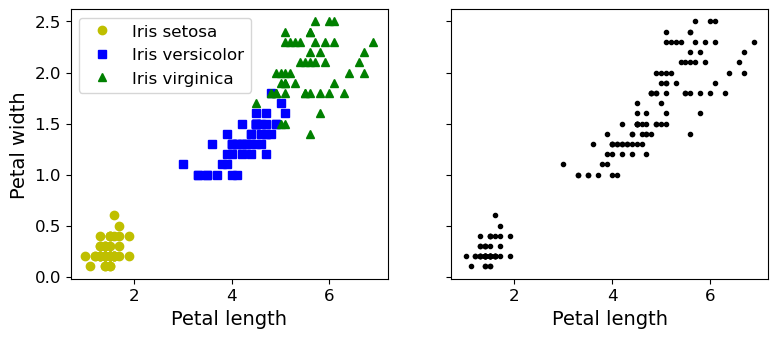

In [4]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

# save_fig("classification_vs_clustering_plot")
plt.show()

- 왼쪽은 붓꽃 데이터셋임
    - 각 샘플의 품종이 구분되어 나타나 있음
    - 레이블이 되어 있음
    - 로지스틱 회귀, SVM, 랜덤 포레스트 분류기가 분류 알고리즘에 ㅜ잘 맞음
- 오른쪽은 동일한 데이터지만 레이블이 없음
    - 분류 알고리즘 사용 불가
    - 군집 알고리즘 필요

---
- 특성을 사용하면 군집 알고리즘이 클러스터 세 개를 매우 잘 구분할 수 있을 것임

---
**군집 알고리즘을 사용하는 경우**
1. 고객 분류
- 고객을 구매 이력이나 웹사이트 내 행동 등을 기반으로 클러스터로 모을 수 있음
- 고객이 누구인지 고객이 무엇을 원하는지 이해하는 데 도움이 됨
- 고객 그룹마다 제품 추천이나 마케팅 전략을 다르게 적용할 수 있음
- 동일한 클러스터 내의 사용자가 좋아하는 컨텐츠를 추천하는 **추천 시스템**을 만들 수 있음
2. 데이터 분석
- 새로운 데이터셋을 분석할 때 군집 알고리즘을 실행하고 각 클러스터를 따로 분석하면 도움이 됨
3. 차원 축소 기법
- 한 데이터셋에 군집 알고리즘을 적용하면 각 클러스터에 대한 샘플의 **친화성**을 측정할 수 있음
- k개의 클러스터가 있으면 k차원이 됨
4. 이상치 탐지
- 친화성이 낮은 샘플은 이상치일 가능성이 높음
- **부정 거래 감지**에 활용됨
5. 준지도 학습
- 레이블된 샘플이 적다면 군집을 수행하고 동일한 클러스터에 있는 모든 샘플에 레이블을 전파할 수 있음
- 지도 학습 알고리즘에 필요한 레이블이 크게 증가해 성능을 크게 향상함
6. 검색 엔진
- 제시된 이미지와 비슷한 이미지를 찾아줌
7. 이미지 분할
- 색을 기반으로 픽셀을 클러스터로 모음
- 그다음 각 픽셀의 색을 해당 클러스터의 평균 색으로 바꿈
- 이미지에 있는 색상의 종류를 크게 줄임

클러스터에 대한 보편적인 정의는 없고 상황에 따라 다름
- 어떤 알고리즘은 **센트로이드**라 부르는 특정 포인트를 중심으로 모인 샘플을 찾음
- 어떤 알고리즘은 샘플이 밀집되어 연속된 영역을 찾음
- 어떤 알고리즘은 계층적으로 클러스터의 클러스터를 찾음

## k-평균

In [5]:
from sklearn.datasets import make_blobs

In [6]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [7]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [8]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

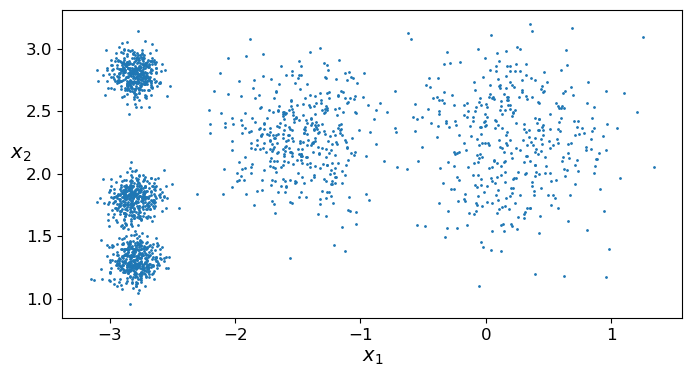

In [9]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
# save_fig("blobs_plot")
plt.show()

레이블이 없는 위 그림을 생각해보자
- k-평균은 반복 몇 번으로 이런 종류의 데이터셋을 빠르고 효율적으로 클러스터로 묶을 수 있는 간단한 알고리즘임
- k-평균 알고리즘은 각 클러스터의 중심을 찾고 가장 가까운 클러스터에 샘플을 할당함

In [10]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

알고리즘이 찾을 클러스터 개수 k를 지정해야함. 이는 쉬운 일이 아님

- 각 샘플은 다섯 개의 클러스터 중 하나에 할당됨
- 군집에서 각 샘플의 **레이블**은 알고리즘이 샘플에 할당한 클러스터의 인덱스임
    - 분류에서의 레이블과 다름
- KMeans 클래스의 labels_ 인스턴스 변수에 레이블이 있음

In [11]:
y_pred

array([4, 0, 1, ..., 2, 1, 0])

In [12]:
y_pred is kmeans.labels_

True

- 센트로이드 다섯 개도 확인 가능

In [13]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

- 새로운 샘플에 가장 가까운 센트로이드의 클러스터를 할당할 수 있음

In [14]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

In [15]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

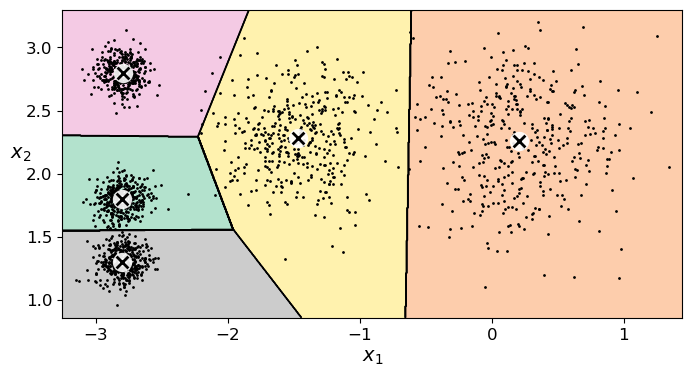

In [16]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
# save_fig("voronoi_plot")
plt.show()

- 클러스터의 결정 경계를 그려보면 보로노이 다이어그램을 얻을 수 있음
- 센트로이드는 x로 표시됨

- **샘플**은 대부분 적절한 클러스터에 잘 할당됨
    - 하지만 샘플 몇 개는 레이블이 잘못 부여됨
- k-평균 알고리즘은 클러스터의 크기가 많이 다르면 잘 작동하지 않음
- 샘플을 클러스터에 할당할 때 센트로이드까지 거리를 고려하는 것이 전부이기 때문

**하드 군집**이라는 샘플을 하나의 클러스터에 할당하는 것보다 클러스터마다 샘플에 점수를 부여하는 것이 유용할 수 있음
- 이를 **소프트 군집**이라고 함
- 점수는 샘플과 센트로이드 사이의 거리가 될 수 있음 (가우시안 방사기저 함수와 같은 유사도 점수가 될 수 있음)
- KMeans 클래스의 transform() 메서드는 샘플과 각 센트로이드 사이의 거리를 반환함

In [17]:
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

- 매우 효율적인 비선형 차원 축소 기법이 될 수 있음

---
**k-평균 알고리즘**

어떻게 작동하는 것일까?
- 가장 가까운 센트로이드의 클러스터를 할당할 수 있음
- 반대로 모든 샘플의 레이블이 주어진다면 각 클러스터에 속한 샘플의 평균을 계산하여 모든 센트로이드를 쉽게 구할 수 있음
- 레이블이나 센트로이드가 주어지지 않으면 어떻게 할까?
    - 처음에는 센트로이드를 랜덤하게 선정함
    - 그다음 샘플에 레이블을 할당하고 센트로이드를 업데이트하고 반복
    - 변화가 없을 때까지 계속함
        - 무한하게 반복되지 않을 것임

In [18]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=0)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=0)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=0)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

C:\Users\hansol\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\hansol\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\hansol\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=0)

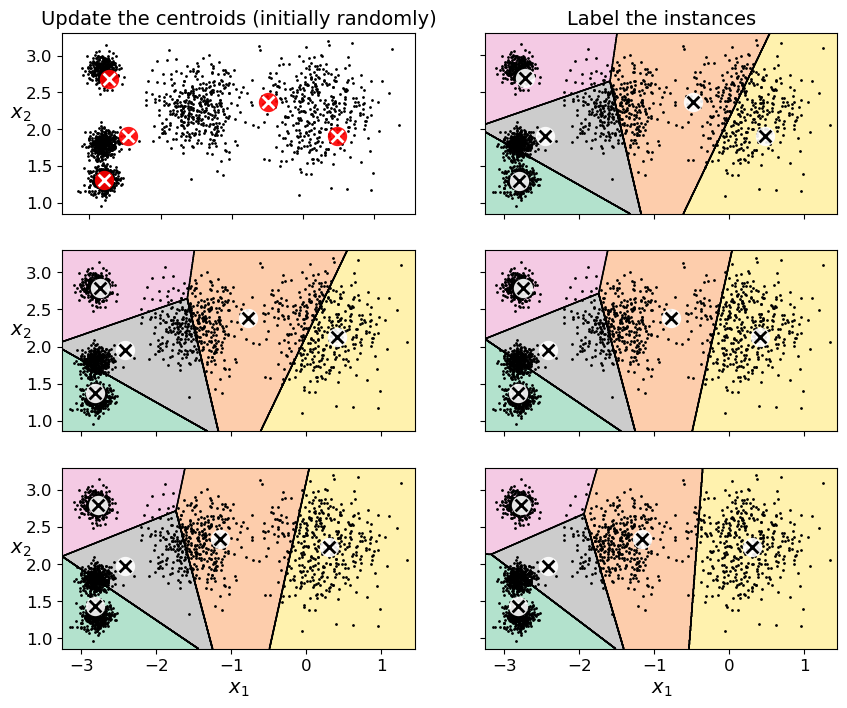

In [19]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

# save_fig("kmeans_algorithm_plot")
plt.show()

이 알고리즘이 수렴하는 것이 보장되지만 적절한 솔루션으로 수렴하지 못할 수 있음
- 이 여부는 센트로이드 초기화에 달려 있음

In [20]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

C:\Users\hansol\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(
C:\Users\hansol\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


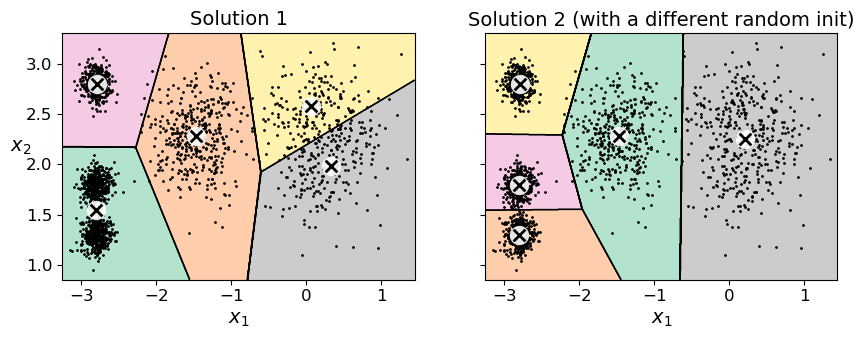

In [21]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=5)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

# save_fig("kmeans_variability_plot")
plt.show()

- 초기화에 따라 달라진 솔루션을 위 그림을 통해 알 수 있음

---
**센트로이드 초기화 방법**

센트로이드 위치를 근사하게 알 수 있으면 init 매개변수에 센트로이드 리스트를 담은 넘파이 배열을 지정하고 n_init를 1로 설정할 수 있음

In [22]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1)

또 다른 방법은 랜덤 초기화를 다르게 하여 여러 번 알고리즘을 실행하고 가장 좋은 솔루션을 선택하는 것임
- 랜덤 초기화 횟수는 n_init 매개변수로 조절함
    - 기본값은 10임
    - fit() 메서드를 호출할 때 앞서 설명한 전체 알고리즘이 10번 실행된다는 뜻임
- 최선의 솔루션을 반환함
    - 성능 지표로 가능
    - 각 샘플과 가장 가까운 센트로이드 사이의 평균 제곱 거리이며 모델의 **이너셔(inertia)**라고 부름
    - 이너셔가 가장 낮은 모델을 반환함
    - 이 값이 궁금하면 inertia_ 인스턴스 변수로 모델의 이너셔를 확인할 수 있음

In [23]:
kmeans_rnd_init1.inertia_

219.43539442771407

score() 메서드는 이너셔의 음숫값을 반환함
- 음수인 이유는 예측기의 score() 메서드는 큰 값이 좋은 것이다라는 규칙을 따라야 하기 때문
- 한 예측기가 다른 것보다 좋다면 score() 메서드가 더 높은 값을 반환해야함

In [24]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [25]:
kmeans.score(X)

-211.59853725816834

데이비드 아서와 세르게이 바실비츠키가 k-평균++ 알고리즘을 제안함
- 다른 센트로이드와 거리가 먼 센트로이드를 선택하는 똑똑한 초기화 단계를 소개함
- k-평균 알고리즘이 최적이 아닌 솔루션으로 수렴할 가능성을 크게 낮춤
- 반복 횟수를 크게 줄일 수 있음

k-평균++ 초기화 알고리즘

1. 데이터셋에서 무작위로 균등하게 하나의 센트로이드 $c^{(1)}$을 선택함
2. $D(x^{(i)})^2/\sum^m_{j=1}D(x^{(j)})^2$의 확률로 샘플 $x^{(i)}$를 새로운 센트로이드 $c^{(i)}$로 선택함. 여기에서 $D(x^{(i)})$는 샘플 $x^{(i)}$와 이미 선택된 가장 가까운 센트로이드까지 거리임. 이 확률 분포는 이미 선택한 센트로이드에서 멀리 떨어진 샘플을 다음 센트로이드로 선택할 가능성을 높임
3. k개의 센트로이드가 선택될 때까지 이전 단계를 반복함

KMeans 클래스는 기본적으로 이 초기화 방법을 사용함
- 원래 방식을 사용하고 싶다면 init 매개변수를 "random"으로 지정함

**k-평균 속도 개선과 미니배치 k-평균**
2013년 찰스 엘칸의 논문에서 k-평균 알고리즘에 대해 또 다른 중요한 개선을 제안함
- 불필요한 거리 계산을 피함으로써 알고리즘의 속도를 상당히 높임
- 삼각 부등식 사용함(두 점 사이의 직선은 항상 가장 짧은 거리가 됨)
- 샘플과 센트로이드 사이의 거리를 위한 하한선과 상한선을 유지함
- **기본적으로 KMeans 클래스가 사용하는 알고리즘임**
---
2010년 데이비드 스컬리의 논문에서 k-평균 알고리즘의 또 다른 중요한 변종이 제시됨
- 전체 데이터셋을 사용해 반복하지 않고 이 알고리즘은 각 반복마다 미니배치를 사용해 센트로이드를 조금씩 이동함
- 속도 를 3배에서 4배 정도 높임
- MiniBatchKMeans 클래스에서 구현함

In [26]:
from sklearn.cluster import MiniBatchKMeans
minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

C:\Users\hansol\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


MiniBatchKMeans(n_clusters=5)

데이터셋이 메모리에 들어가지 않으면 가장 간단한 방법은 8장의 점진적 PCA에서 했던 것처럼 memmap 클래스를 사용하는 것임
- 또는 MiniBatchKMeans 클래스의 partial_fit() 메서드에 한 번에 하나의 미니배치를 전달 할 수 있음
    - 하지만 초기화를 여러 번 수행하고 결과에서 직접 골라야 해서 할 일이 많음

---
미니배치 k-평균 알고리즘이 훨씬 빠르지만 이너셔는 조금 더 나쁨
- 특히 클러스터의 개수가 증가할 때 더 그럼

In [29]:
minibatch_kmeans.inertia_

220.45989885531884

In [30]:
import urllib.request
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.int64)

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    mnist["data"], mnist["target"], random_state=42)

In [33]:
filename = "my_mnist.data"
X_mm = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
X_mm[:] = X_train

In [34]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42)
minibatch_kmeans.fit(X_mm)

C:\Users\hansol\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


MiniBatchKMeans(batch_size=10, n_clusters=10, random_state=42)

In [35]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

In [36]:
np.random.seed(42)

In [37]:
k = 5
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500  # more data for K-Means++ initialization
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

C:\Users\hansol\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(
C:\Users\hansol\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(
C:\Users\hansol\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 3072 or by setting the environment variable OMP_NUM_THREADS=2
  warnings.warn(
C:\U

In [39]:
best_kmeans.score(X)

-211.6257187889114

In [40]:
from timeit import timeit

In [41]:
times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print("\r{}/{}".format(k, 100), end="")
    times[k-1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

100/100

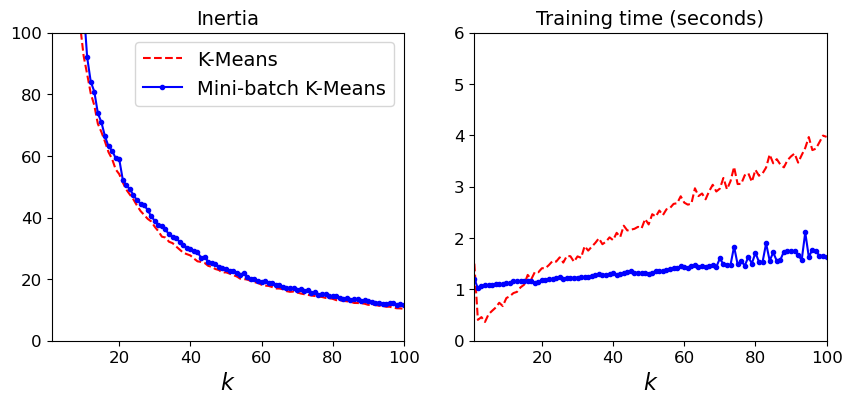

In [42]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, 100, 0, 6])

# save_fig("minibatch_kmeans_vs_kmeans")
plt.show()

 **최적의 클러스터 개수 찾기**
 
 클러스터 개수가 어떻게 설정할지 쉽게 알 수 없음
 - 올바르게 지정하지 않으면 매우 나쁠 수 있음

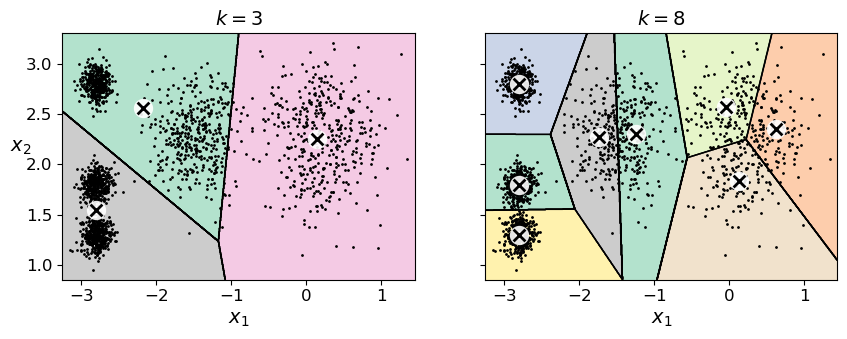

In [43]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
# save_fig("bad_n_clusters_plot")
plt.show()

k가 너무 적으면 별개의 클러스터를 합치고, k가 너무 크면 하나의 클러스터가 여러 개로 나뉨

---
가장 작은 이너셔를 가진 모델을 선택하면 되지 않을까?
- 그렇게 간단하지 않음
- k가 증가함에 따라 이너셔는 작아짐
    - k가 계속 증가할 것임

In [44]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

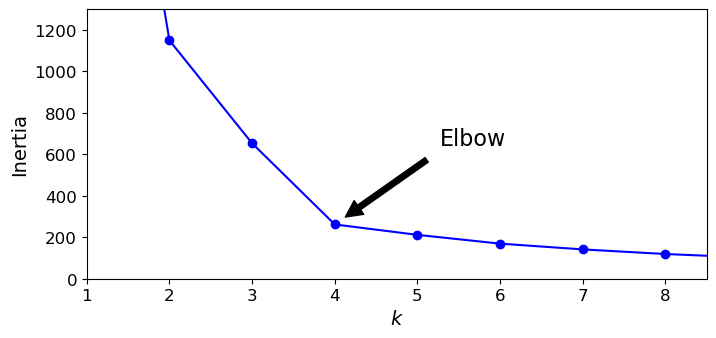

In [45]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
# save_fig("inertia_vs_k_plot")
plt.show()

꺾이는 지점을 엘보(elbow)라고 함
- 엘보 지점인 k를 선택하면 좋은 선택이 됨

---
더 정확한 방법은 **실루엣 점수**
- 모든 샘플에 대한 **실루엣 계수**의 평균임
- 실루엣 계수는 $(b-a)/max(a,b)$로 계산함
- a는 동일한 클러스터에 있는 다른 샘플까지 평균 거리임
- b는 가장 가까운 클러스터까지 평균 거리임
- -1에서 1까지 바뀔 수 있음
- 1에 가까우면 자신의 클러스터 안에 잘 속해 있고 다른 클러스터와는 멀리 떨어져 있따는 뜻임
---
silhouette_score()함수를 사용하여 실루엣 점수를 계산

In [46]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.6555176425728279

In [49]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

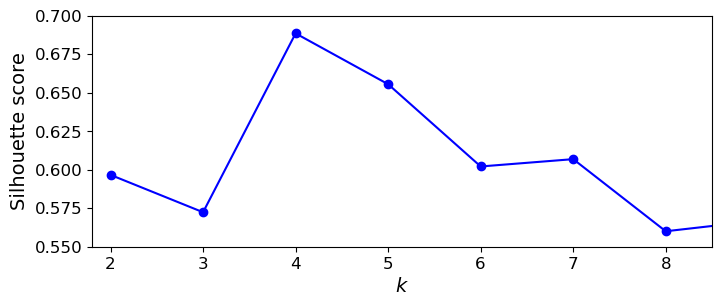

In [50]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
# save_fig("silhouette_score_vs_k_plot")
plt.show()

k=5도 꽤 좋아보임
- 모든 샘플의 실루엣 계수를 할당된 클러스터와 계숫값으로 정렬하여 그리면 더 많은 정보를 얻을 수 있음
    - 이를 **실루엣 다이어그램**이라고 함
    - 클러스터마다 칼 모양의 그래프가 그려짐
    - 높이는 클러스터가 포함하고 있는 샘플의 개수를 의미하고, 너비는 이 클러스터에 포함된 샘플의 정렬된 실루엣 계수를 나타냄

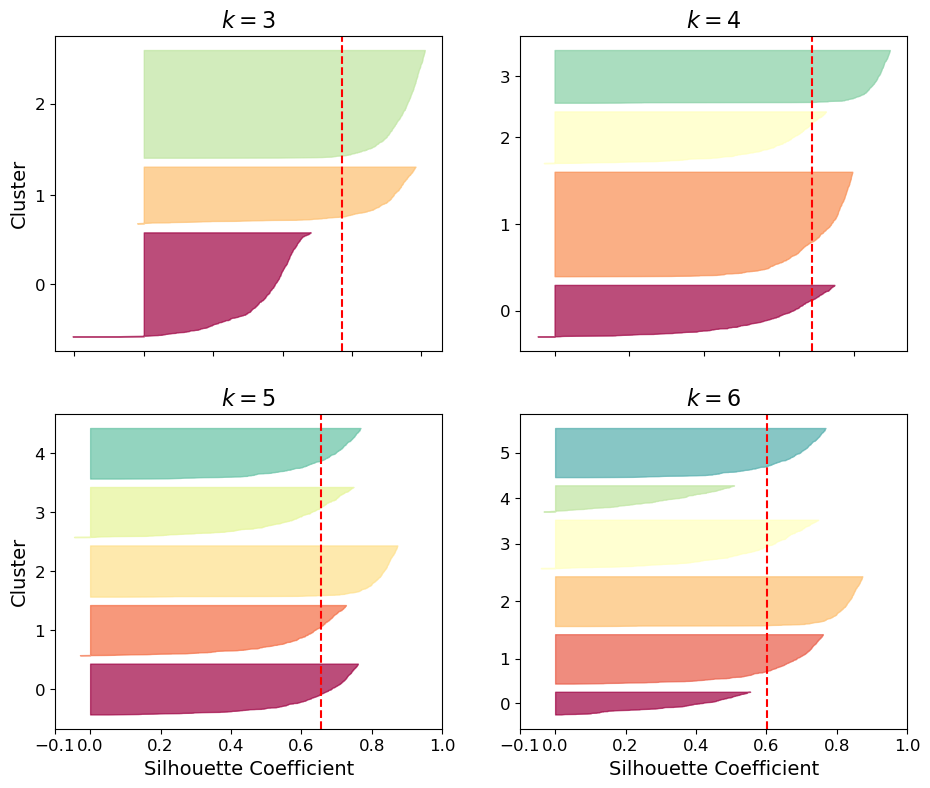

In [51]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

# save_fig("silhouette_analysis_plot")
plt.show()

수직 파선은 각 클러스터 개수에 해당하는 실루엣 점수임
- 한 클러스터의 샘플 대부분이 이 점수보다 낮은 계수를 가지면 클러스터의 샘플이 다른 클러스터랑 너무 가깝다는 것을 의미함
    - k=3, k=6에 해당함
- k=4나 k=5일 때는 클러스터가 상당히 좋아보임
- 샘플이 파선을 넘어서 뻗어 있고 1.0에 근접해 있음
- 비슷한 실루엣 점수를 가진 k=5를 선택하는 것이 좋음

## k-평균의 한계

속도가 빠르고 확장이 용이하다는 장점이 있찌만 최적이 아닌 솔루션을 피하려면 알고리즘을 여러 번 실행해야 함
- 또한 클러스터 개수를 지정해야함
- 클러스터의 크기나 밀집도가 서로 다르거나 원형이 아닐 경우 잘 작동하지 않음

In [52]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

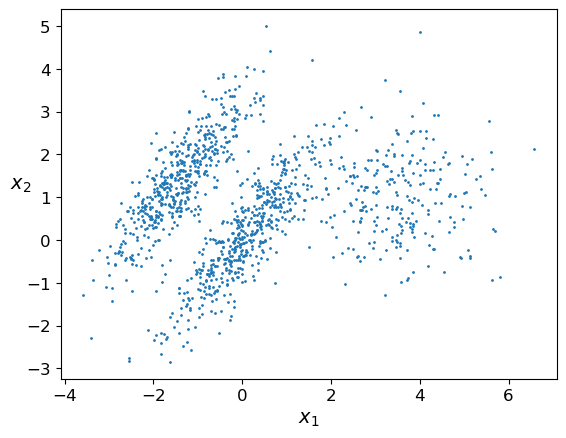

In [53]:

plot_clusters(X)

In [54]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, random_state=42)

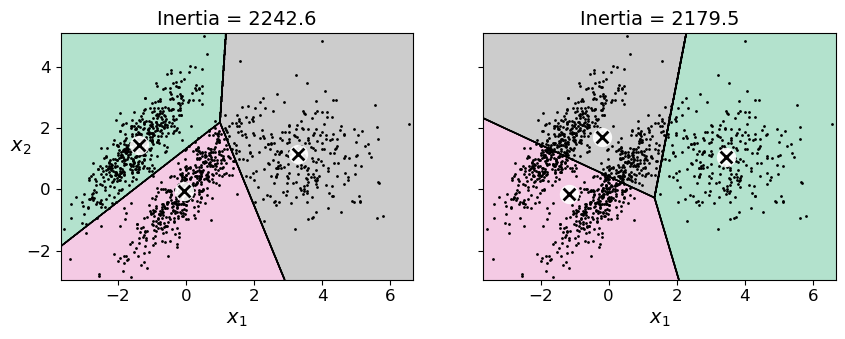

In [55]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

# save_fig("bad_kmeans_plot")
plt.show()

적절하게 분류하지 못하는 것을 볼 수 있음

타원형 클러스터에서는 가우시안 혼합 모델이 잘 작동함

## 군집을 사용한 이미지 분할

**이미지 분할**은 이미지를 세그먼트 여러 개로 분할하는 작업임
- **시맨틱 분할**에서는 동일한 종류의 물체에 속한 모든 픽셀은 같은 세그먼트에 할당

In [59]:
# Download the ladybug image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\unsupervised_learning\\ladybug.png',
 <http.client.HTTPMessage at 0x1ad64a0ba00>)

In [60]:
from matplotlib.image import imread
image = imread(os.path.join("images", "unsupervised_learning","ladybug.png"))
image.shape

(533, 800, 3)

In [61]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [62]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

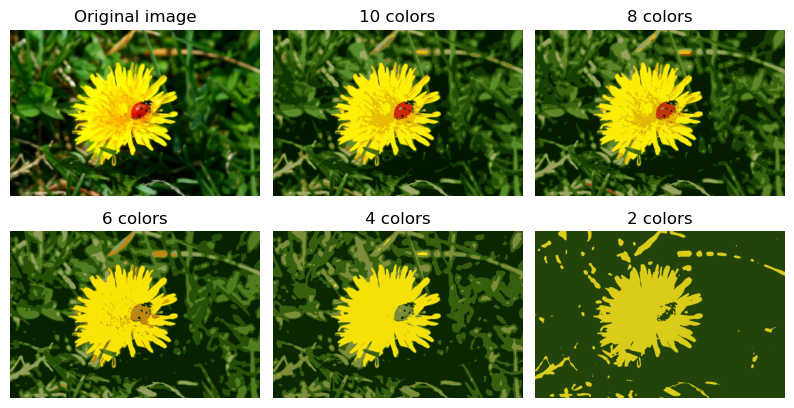

In [63]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

# save_fig('image_segmentation_diagram', tight_layout=False)
plt.show()

## 군집을 사용한 전처리

군집은 지도 학습 알고리즘을 적용하기 전에 전처리 단계로 사용할 수 있음

In [64]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

In [65]:
# 훈련 세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

로지스틱 회귀 모델을 훈련

In [66]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [67]:
log_reg.score(X_test, y_test)

0.9733333333333334

k-평균을 전처리 단계로 사용해 더 좋아보이는지 확인해보겠음
- 파이프라인을 만들어 적용

In [68]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans",KMeans(n_clusters=50)),
    ("log_reg",LogisticRegression()),
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg', LogisticRegression())])

In [69]:
pipeline.score(X_test, y_test)

0.9755555555555555

차원을 50으로 감소시켰지만 성능 향상됨
- 변환된 데이터셋이 원본 데이터셋보다 선형적으로 더 잘 구분할 수 있기 때문임

클러스터 개수 k를 임의로 정했으니 GridSearchCV를 사용해 최적의 클러스터 개수를 찾아보겠음

In [71]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.0s
[CV] END ...............................kmeans_

[CV] END ..............................kmeans__n_clusters=35; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=36; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=36; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=36; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=37; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=37; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=37; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=38; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=38; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=38; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=39; total time=   0.1s
[CV] END ..............................kmeans__n_clusters=39; total time=   0.1s
[CV] END ...................

[CV] END ..............................kmeans__n_clusters=69; total time=   0.2s
[CV] END ..............................kmeans__n_clusters=70; total time=   0.2s
[CV] END ..............................kmeans__n_clusters=70; total time=   0.2s
[CV] END ..............................kmeans__n_clusters=70; total time=   0.2s
[CV] END ..............................kmeans__n_clusters=71; total time=   0.2s
[CV] END ..............................kmeans__n_clusters=71; total time=   0.2s
[CV] END ..............................kmeans__n_clusters=71; total time=   0.2s
[CV] END ..............................kmeans__n_clusters=72; total time=   0.2s
[CV] END ..............................kmeans__n_clusters=72; total time=   0.2s
[CV] END ..............................kmeans__n_clusters=72; total time=   0.2s
[CV] END ..............................kmeans__n_clusters=73; total time=   0.2s
[CV] END ..............................kmeans__n_clusters=73; total time=   0.2s
[CV] END ...................

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                                       ('log_reg', LogisticRegression())]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [72]:
grid_clf.best_params_

{'kmeans__n_clusters': 80}

In [73]:
grid_clf.score(X_test, y_test)

0.9755555555555555

## 군집을 사용한 준지도 학습

준지도 학습에서 군집을 사용함
- 레이블이 없는 데이터가 많고 레이블이 있는 데이터는 적을 때 사용함

In [74]:
n_labeled=50
log_reg = LogisticRegression()
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression()

In [75]:
log_reg.score(X_test, y_test)

0.8266666666666667

정확도가 오히려 낮음
- 50개의 클러스터로 훈련 세트를 모으고 각 클러스터에서 센트로이드에 가장 가까운 이미지를 찾음
    - 이러한 이미지를 **대표 이미지**라고 부름

In [76]:
k = 50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

대표 이미지 50개

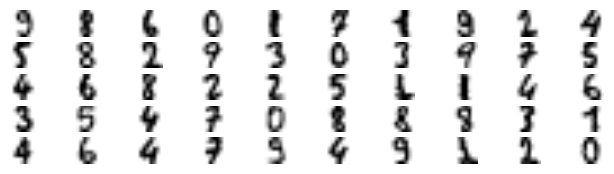

In [77]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

# save_fig("representative_images_diagram", tight_layout=False)
plt.show()

In [78]:
y_train[representative_digit_idx]

array([9, 8, 6, 0, 1, 7, 1, 9, 2, 4, 5, 8, 2, 9, 3, 0, 3, 9, 7, 5, 4, 6,
       8, 2, 2, 5, 1, 1, 4, 6, 3, 5, 4, 7, 0, 8, 8, 8, 3, 1, 4, 6, 4, 7,
       9, 4, 9, 1, 2, 0])

이미지를 보고 수동으로 레이블 할당

In [79]:
y_representative_digits = np.array([9, 8, 6, 0, 1, 7, 1, 9, 2, 4, 5, 8, 2, 9, 3, 0, 3, 9, 7, 5, 4, 6,
       8, 2, 2, 5, 1, 1, 4, 6, 3, 5, 4, 7, 0, 8, 8, 8, 3, 1, 4, 6, 4, 7,
       9, 4, 9, 1, 2, 0])

In [80]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9377777777777778

정확도 엄청 높아짐
- 무작위 샘플 대신 대표 샘플에 레이블을 할당하는 것이 좋은 방법임
---
- 레이블을 동일한 클러스터에 있는 모든 샘플로 전파하는 것이 **레이블 전파**

In [81]:
kmeans.labels_

array([45,  8, 15, ..., 23,  5,  4])

In [82]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i]= y_representative_digits[i]

In [83]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.9266666666666666

성능을 어느정도 올렸지만 놀라운 정도는 아님
- 샘플의 레이블을 동일한 클러스터의 모든 샘플에 전파한 것임
- 클러스터 경계에 가깝게 위치한 샘플이 포함되어 있고 아마 잘못 레이블이 부여되었을 것임
- 센트로이드와 가까운 샘플의 20%에만 레이블을 전파해보고 어떻게 되는지 확인해보겠음

In [84]:
# 깃허브에서는 75%에 전파했음
percentile_closest = 75

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [85]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [86]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [87]:
log_reg.score(X_test, y_test)

0.9444444444444444

성능이 엄청 향상됨
- 전파된 레이블이 실제로 매우 좋기 때문임

In [88]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9731075697211156

---
**능동 학습**
- 모델과 훈련 세트를 지속적으로 향상하기 위해 다음 단계로 **능동 학습**을 몇 번 반복할 수 있음
- 능동 학습에는 많은 전략이 있찌만 가장 널리 사용되는 것 중 하나는 **불확실성 샘플링**임
1. 수집한 레이블된 샘플에서 모델을 훈련함. 이 모델을 사용해 레이블되지 않은 모든 샘플에 대한 예측을 만듦
2. 모델이 가장 불확실하게 예측한 샘플을 전문가에게 보내 레이블을 붙임
3. 레이블을 부여하는 노력만큼의 성능이 향상되지 않을 때까지 이를 반복함

## DBSCAN

밀집된 연속적 지역을 클러스터로 정의함

- 알고리즘이 각 샘플에서 작은 거리인 $\epsilon$내에 샘플이 몇 개 놓여 잇는지 셈. 이 지역을 샘플의 **$\epsilon$-이웃**이라고 부름
- (자기 자신을 포함해)$\epsilon$-이웃 내에 적어도 min_samples개 샘플이 있다면 이를 **핵심 샘플**로 간주함. 즉 핵심 샘플은 밀집된 지역에 있는 샘플임
- 핵심 샘플의 이웃에 있는 모든 샘플은 동일한 클러스터에 속함. 이웃에는 다른 핵심 샘플로 포함될 수 있음. 따라서 핵심 샘플의 이웃의 이웃은 계속해서 하나의 클러스터를 형성함
- 핵심 샘플이 아니고 이웃도 아닌 샘플은 이상치로 판단함

---
이 알고리즘은 모든 클러스터가 충분히 밀집되어 있고 밀집되지 않은 지역과 잘 구분될 때 좋은 성능을 냄

In [89]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [90]:
dbscan.labels_

array([-1,  0,  1,  0,  2,  0,  1,  2,  0,  0,  1, -1,  3,  0, -1,  0,  3,
        5,  3,  4,  5,  5,  4,  1,  0,  1,  0,  0,  2,  0,  2,  5,  1,  0,
        5,  5,  0,  1,  5,  1,  1,  5,  0,  0,  5,  2, -1,  3,  5,  1,  0,
        2,  3,  4,  1,  0,  1,  5,  2,  5,  2,  1,  1,  2,  1,  5, -1,  5,
        3,  3,  3,  1,  5,  5,  1,  0,  0,  4,  1,  1,  0,  0, -1,  2,  3,
        4,  5,  0,  3,  3,  3,  3,  0,  3,  3,  5,  3,  2,  1,  3,  5,  1,
        3,  3, -1,  1,  5,  3,  3,  1, -1,  0,  4,  1,  0,  1,  3,  5,  2,
        0,  5,  0,  0,  0, -1,  0,  6,  4,  3,  5,  5,  0,  3,  2,  5,  0,
       -1,  0,  1,  3,  0,  3,  1,  5,  0,  1, -1,  1,  5,  0,  1,  5,  3,
        0,  0,  4,  0,  1,  0,  5,  3,  5,  4,  1,  3,  0,  3,  0,  5,  0,
        3,  1,  5,  5,  0,  0,  5,  0,  2,  3, -1, -1,  0,  0,  3,  3,  5,
        5,  0,  1,  0,  4,  5, -1,  0,  6,  3,  0,  1,  0, -1,  5,  4,  0,
        1,  5,  0,  3,  0,  0,  3,  3,  4,  5,  3,  0,  5,  3,  1,  4,  1,
        1,  2,  0,  5,  0

일부 샘플의 클러스터 인덱스는 -1임. 이는 알고리즘이 이 샘플을 이상치로 판단했다는 의미임

In [91]:
len(dbscan.core_sample_indices_)

818

In [92]:
dbscan.core_sample_indices_

array([  1,   2,   3,   4,   5,   6,   7,   8,  10,  12,  13,  15,  16,
        18,  19,  20,  21,  23,  24,  25,  26,  27,  29,  30,  31,  32,
        33,  34,  35,  36,  37,  38,  40,  41,  42,  43,  44,  45,  49,
        50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  67,  68,  69,  70,  71,  72,  74,  75,  76,  77,
        78,  79,  80,  81,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  94,  96,  97,  98,  99, 100, 101, 102, 103, 105, 106, 108,
       109, 112, 113, 114, 115, 116, 117, 118, 119, 120, 122, 123, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 139,
       140, 141, 142, 143, 144, 145, 148, 149, 150, 151, 152, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 185, 186,
       187, 190, 191, 192, 194, 196, 197, 198, 199, 201, 202, 203, 204,
       205, 206, 207, 208, 209, 210, 211, 212, 214, 217, 218, 21

In [93]:
dbscan.components_

array([[ 0.6756296 , -0.48778928],
       [ 0.96212786, -0.54007939],
       [ 0.02247853,  0.28425583],
       ...,
       [ 0.33667643, -0.30487329],
       [-0.05882219,  0.45905161],
       [-0.93562242,  0.10541776]])

In [94]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

DBSCAN(eps=0.2)

In [95]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

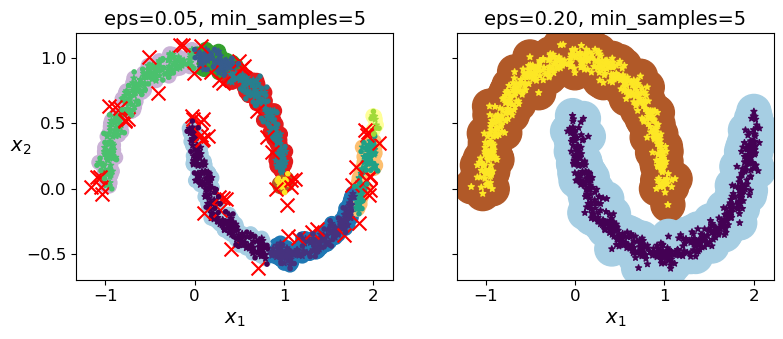

In [96]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

# save_fig("dbscan_plot")
plt.show()

- 클러스터 7개 만들었고 많은 샘플을 이상치로 판단하였음
- eps를 0.2로 증가해 샘플의 이웃 범위를 넓히면 오른쪽처럼 됨

- DBSCAN 클래스는 predict() 메서드를 제공하지 않고 fit_predict() 메서드를 제공함
- 새로운 샘플에 대해 예측할 수 없음

In [101]:
dbscan = dbscan2

In [102]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

이제 샘플 몇 개를 전달하여 어떤 클러스터에 속할 가능성이 높은지 예측하고 각 클러스터에 대한 확률을 추정해봄

In [103]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0], dtype=int64)

In [104]:
knn.predict_proba(X_new)

array([[0.2, 0.8],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ]])

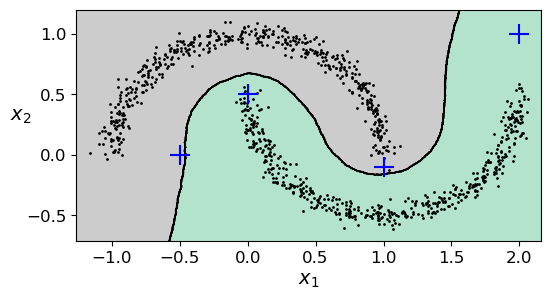

In [105]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
# save_fig("cluster_classification_plot")
plt.show()

- 핵심 샘플에서만 훈련했지만 모든 샘플에서 훈련할 수도 있음
- 이상치를 제외할 수 있음
- 선택은 최종 작업의 성능에 따라 결정됨
- 훈련 세트에 이상치가 없기 때문에 클러스터가 멀리 떨어져 있떠라도 분류기는 항상 클러스터 한 개를 선택함
- 최대 거리를 사용하면 두 클러스터에서 멀리 떨어진 샘플을 이상치로 간단히 분류할 수 있음

In [106]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  1, -1], dtype=int64)

DBSCAAN은 클러스터의 모양과 개수에 상관없이 감지할 수 있는 능력이 있음
- 이상치에 안정적이고 하이퍼파라미터가 두 개뿐임 (eps와 min_samples)
- 클러스터 간의 밀집도가 크게 다르면 모든 클러스터를 올바르게 잡아내는 것이 불가능함
- 계산 복잡도 $O(m log m)$임
- 샘플 개수에 대해 거의 선형적으로 증가함
- eps가 커지면 $O(m^2)$만큼 메모리가 필요함

## 다른 군집 알고리즘

**병합 군집**

클러스터 계층을 밑바닥부터 위로 쌓아 구성함
- 비슷한 반복마다 병합 군집은 인접한 클러스터 쌍을 연결함
- 연결 행렬이 없으면 대규모 데이터셋으로 확장하기 어려움

**BIRCH**

대규모 데이터셋을 위해 고안됨
- 제한된 메모리를 사용해 데이터셋을 다룰 수 있음

**평균-이동**

각 샘플을 중심으로 하는 원을 그림
- 원마다 안에 포함된 모든 샘플의 평균을 구함
- 원의 중심을 평균점으로 이동시킴
- 모든 원이 움직이지 않을 때까지 이 평균-이동을 계속함
- 모양이나 개수에 상관없이 클러스터를 찾을 수 있고 하이퍼파라미터도 매우 적음
- 내부 밀집도가 불균형할 때 여러 개로 나누는 경향이 있음
- 계산 복잡도는 $O(m^2)$임. 따라서 대규모 데이터셋에는 적합하지 않음

**유사도 전파**
- 투표 방식을 사용함
- 자신을 대표할 수 있는 비슷한 샘플에 투표함
- 크기가 다른 여러 개의 클러스터를 감지할 수 있음
- 계산 복잡도는 $O(m^2)$임. 따라서 대규모 데이터셋에는 적합하지 않음

**스펙트럼 군집**
- 샘플 사이의 유사도 행렬을 받아 저차원 임베딩을 만듦
- 저차원 공간에서 또 다른 군집 알고리즘을 사용함

_스펙트럼 군집_

In [107]:
from sklearn.cluster import SpectralClustering

In [108]:
sc1 = SpectralClustering(n_clusters=2, gamma=100, random_state=42)
sc1.fit(X)

SpectralClustering(gamma=100, n_clusters=2, random_state=42)

In [109]:
sc2 = SpectralClustering(n_clusters=2, gamma=1, random_state=42)
sc2.fit(X)

SpectralClustering(gamma=1, n_clusters=2, random_state=42)

In [110]:
np.percentile(sc1.affinity_matrix_, 95)

0.043418054880129606

In [111]:
def plot_spectral_clustering(sc, X, size, alpha, show_xlabels=True, show_ylabels=True):
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', cmap="Paired", alpha=alpha)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=30, c='w')
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=10, c=sc.labels_, cmap="Paired")
    
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("RBF gamma={}".format(sc.gamma), fontsize=14)

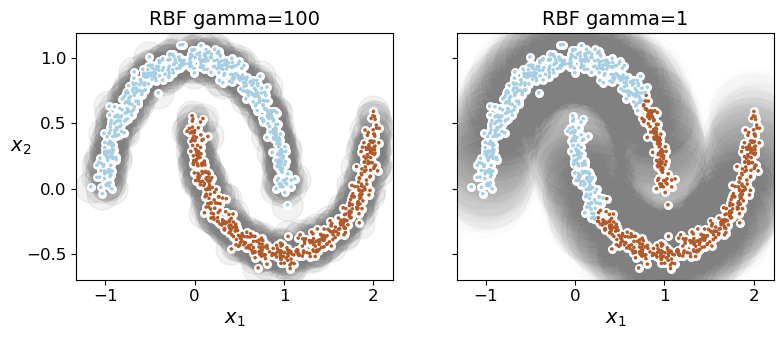

In [112]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_spectral_clustering(sc1, X, size=500, alpha=0.1)

plt.subplot(122)
plot_spectral_clustering(sc2, X, size=4000, alpha=0.01, show_ylabels=False)

plt.show()

_병합 군집_

In [113]:
from sklearn.cluster import AgglomerativeClustering

In [114]:
X = np.array([0, 2, 5, 8.5]).reshape(-1, 1)
agg = AgglomerativeClustering(linkage="complete").fit(X)

In [115]:
def learned_parameters(estimator):
    return [attrib for attrib in dir(estimator)
            if attrib.endswith("_") and not attrib.startswith("_")]

In [116]:
learned_parameters(agg)

['children_',
 'labels_',
 'n_clusters_',
 'n_connected_components_',
 'n_features_in_',
 'n_leaves_']

In [117]:
agg.children_

array([[0, 1],
       [2, 3],
       [4, 5]])

# 가우시안 혼합

**가우시안 혼합 모델(Gaussian mixture model)(GMM)**은 샘플이 파라미터가 알려지지 않은 여러 개의 혼합된 가우시안 분포에서 생성되었다고 가정하는 확률 모델임
- 타원형 모델임
- 각 클러스터는 타원의 모양, 크기, 밀집도, 방향이 다름
- 샘플이 주어지면 가우시안 분포 중 하나에서 생성되었다는 것을 앎
- 어떤 분포인지 또 이 분포의 파라미터는 무엇인지 알지 못함

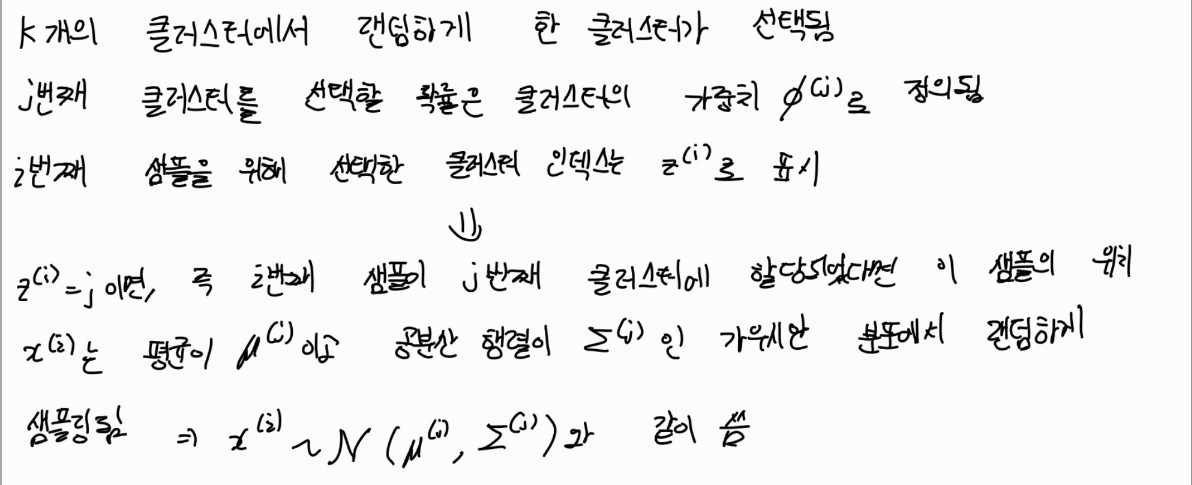

In [122]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [123]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [ ]:
gm.weights_

In [124]:
gm.means_

array([[-1.40764129,  1.42712848],
       [ 3.39947665,  1.05931088],
       [ 0.05145113,  0.07534576]])

In [125]:
gm.covariances_

array([[[ 0.63478217,  0.72970097],
        [ 0.72970097,  1.16094925]],

       [[ 1.14740131, -0.03271106],
        [-0.03271106,  0.95498333]],

       [[ 0.68825143,  0.79617956],
        [ 0.79617956,  1.21242183]]])

**기댓값-최대화 (EM)**알고리즘을 사용
- 클라스터 파라미터를 랜덤하게 초기화하고 수렴할 때까지 두 단계를 반복함
- 샘플을 클러스터에 할당함 (**기댓값 단계**)
- 클러스터를 업데이트함 (**최대화 단계**)
- k-평균과 달리 EM은 하드 클러스터 할당이 아니라 소프트 클러스터 할당임
- 각 클러스터에 속할 확률을 예측하고 최대화 단계에서 각 클러스터가 데이터셋에 있는 모든 샘플을 사용해 업데이트됨
- 클러스터에 속할 추정 확률로 샘플에 가중치가 적용됨
    - 이 확률을 샘플에 대한 클러스터의 **책임**이라고 함

In [126]:
gm.converged_

True

In [127]:
gm.n_iter_

4

알고리즘이 수렴했는지 여부와 반복 횟수를 확인할 수 있음

In [128]:
gm.predict(X)

array([2, 2, 0, ..., 1, 1, 1], dtype=int64)

In [129]:
gm.predict_proba(X)

array([[6.76282339e-07, 2.31833274e-02, 9.76815996e-01],
       [6.74575575e-04, 1.64110061e-02, 9.82914418e-01],
       [9.99922764e-01, 1.99781831e-06, 7.52377580e-05],
       ...,
       [2.12540639e-26, 9.99999568e-01, 4.31902443e-07],
       [1.45002917e-41, 1.00000000e+00, 5.20915318e-16],
       [7.93266114e-41, 1.00000000e+00, 2.30971331e-15]])

가우시안 혼합 모델은 **생성 모델**임
- 이 모델에서 새로운 샘플을 만들 수 있음

In [130]:
X_new, y_new = gm.sample(6)

In [131]:
X_new

array([[-2.14177798,  0.80894516],
       [ 2.29776538, -0.0691601 ],
       [ 4.15306999,  3.664274  ],
       [-0.94936701, -0.80460077],
       [-0.71265933, -0.53100485],
       [ 0.18677006, -0.11652046]])

In [132]:
y_new

array([0, 1, 1, 2, 2, 2])

주어진 위치에서 모델의 밀도를 추정할 수 있음
- 샘플이 주어지면 그 위치의 **확률 밀도 함수(PDF)**의 로그를 예측함
    - 점수가 높을수록 밀도가 높음
    

In [133]:
gm.score_samples(X)

array([-2.60786904, -3.57094519, -3.3302143 , ..., -3.51359636,
       -4.39793229, -3.80725953])

_위는 확률이 아니라 확률 밀도이므로 0과 1사이의 값이 아닌 어떤 값이 될 수 있음_

In [134]:
resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

0.9999999999225095

In [135]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

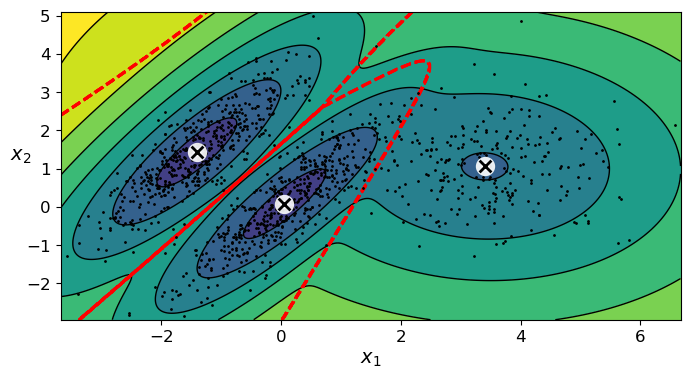

In [136]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

# save_fig("gaussian_mixtures_plot")
plt.show()

특성이나 클러스터가 많거나 샘플이 적을 때는 EM이 최적의 솔루션으로 수렴하기 어려움
- 학습할 파라미터 개수를 제한해야함
---
- 클러스터의 모양과 방향의 범위를 제한함
- 공분산 행렬에 제약을 추가할 수 있음

- `"spherical"` : 모든 클러스터가 원형임. 하지만 지름은 다를 수 있음(즉 분산이 다름)
- `"diga"` : 클러스터는 크기에 상관없이 어떤 타원형도 가능함. 하지만 타원의 축은 좌표 축과 나란해야 함(즉 공분산 행렬이 대각 행렬이어야 함)
- `"tied"` : 모든 클러스터가 동일한 타원 모양, 크기, 방향을 가짐(즉 모든 클러스터는 동일한 공분산 행렬을 공유함)

- `"full"` : 기본값으로 각 클러스터는 모양, 크기, 방향에 제약이 없음

In [137]:
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

GaussianMixture(covariance_type='diag', n_components=3, n_init=10,
                random_state=42)

In [138]:
def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=14)

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize=14)

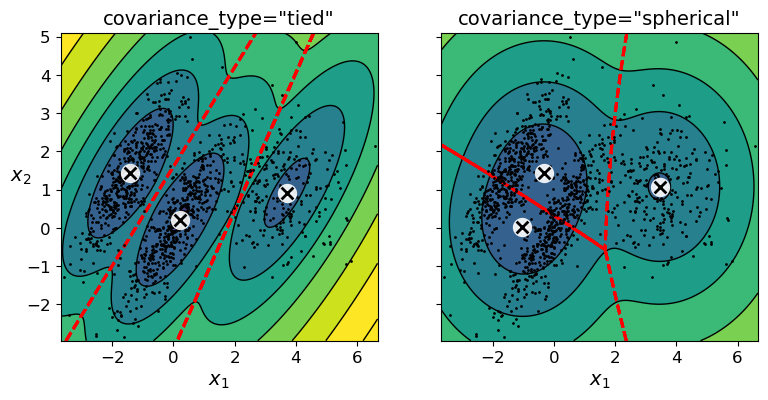

In [139]:
compare_gaussian_mixtures(gm_tied, gm_spherical, X)

# save_fig("covariance_type_plot")
plt.show()

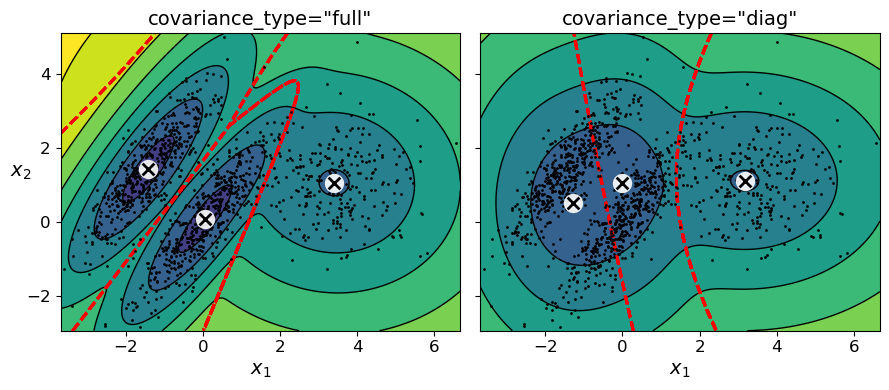

In [140]:
compare_gaussian_mixtures(gm_full, gm_diag, X)
plt.tight_layout()
plt.show()

## 가우시안 혼합을 사용한 이상치 탐지

**이상치 탐지** : 보통과 많이 다른 샘플을 감지하는 작업임
- 보통 샘플은 **정상치**라고 함

밀도가 낮은 지역에 있는 모든 샘플을 이상치로 볼 수 있음
- 밀도 임계값을 정해야함


In [141]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

In [142]:
densities

array([-2.60786904, -3.57094519, -3.3302143 , ..., -3.51359636,
       -4.39793229, -3.80725953])

In [143]:
density_threshold

-5.487013850626154

In [146]:
X.shape

(1250, 2)

In [145]:
anomalies.shape

(50, 2)

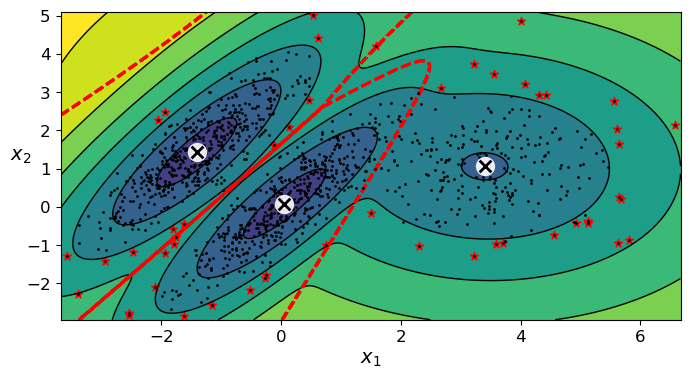

In [147]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

# save_fig("mixture_anomaly_detection_plot")
plt.show()

이와 비슷한 작업은 **특이치 탐지**임
- 이상치로 오염되지 않은 "깨끗한" 데이터셋에서 훈련한다는 것이 이상치 탐지와는 다름
---
- 가우시안 혼합 모델은 이상치를 포함해 모든 데이터셋에 맞추려고 함
- 따라서 이상치가 너무 많으면 편향되고 잘못 생각할 수 있음
- 점진 학습으로 이상치를 제거하는 것이 좋음

## 클러스터 개수 선택하기

k-평균에서는 이너셔나 실루엣 점수를 사용해 적절한 클러스터 개수를 선택함
- 하지만 가우시안 혼합에서는 이런 지표를 사용할 수 없음

대신 **BIC (Bayesian information criterion)**이나 **AIC (akaike information criterion)**와 같은 **이론적 정보 기준**을 최소화하는 모델을 찾음

$BIC = \mbox{log}(m)p-2\mbox{log}(\hat{L})$

$AIC = 2p-2\mbox{log}(\hat{L})$

- m은 샘플의 개수
- p는 모델이 학습할 파라미터 개수
- $\hat{L}$은 모델의 **가능도 함수**의 최댓값임

---
BIC와 AIC는 학습할 파라미터가 많은 모델에게 벌칙을 가하고 데이터에 잘 학습하는 모델에게 보상을 더함
- 대체로 둘다 동일한 모델을 선택함
- BIC가 선택한 모델이 AIC가 선택한 모델보다 간단한 경향이 있음
    - 하지만 데이터에 아주 잘 맞지 않을 수 있음

**가능도 함수**와 **확률**

In [148]:
gm.bic(X)

8189.733705221634

In [150]:
gm.aic(X)

8102.508425106596

In [151]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]

In [152]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

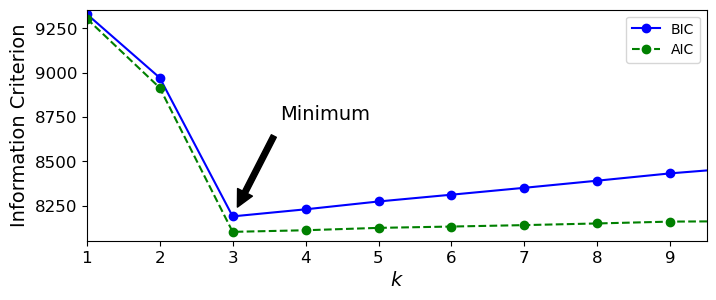

In [153]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
# save_fig("aic_bic_vs_k_plot")
plt.show()

- k에 대한 AIC와 BIC를 보여줌
- k=3일 때 BIC와 AIC 모두 가장 작음
- covariance_type 매개변수에 대해 최선의 값을 탐색할 수도 있음
   - "full" 대신 "spherical"을 선택하면 학습할 파라미터가 크게 줄어듦
       - 하지만 데이터에 잘 맞지 않음
           

## 베이즈 가우시안 혼합 모델

최적의 클러스터 개수를 수동으로 찾지 않고 불필요한 클러스터의 가중치를 0으로 만드는 모델임
- 클러스터 개수 n_components를 최적의 클러스터 개수보다 크다고 믿을 만한 값으로 지정함
- 자동으로 불필요한 클러스터를 제거함

In [154]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components=10, n_init=10)
bgm.fit(X)
np.round(bgm.weights_, 2)

array([0.4 , 0.2 , 0.39, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

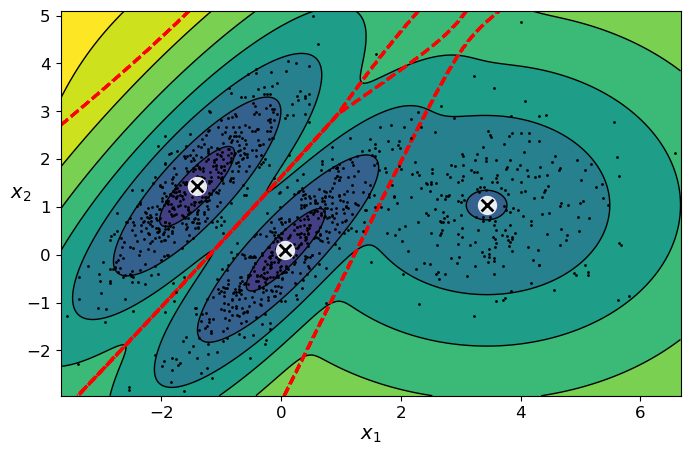

In [155]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)
plt.show()

3개의 클러스가 필요하다는 것을 감지했음

---
**베타 분포**는 고정 범위 안에 놓인 값을 가진 확률 변수를 모델링할 때 자주 사용됨

SBP(stick-breaking process)
- 새로운 샘플이 작은 클러스터보다 큰 클러스터에 합류할 가능성이 높은 데이터셋에 잘 맞음
- 농도 $\alpha$값이 크면 $\Phi$값이 0에 가깝게 되고 SBP는 많은 클러스터를 만듦
- 위샤트 분포를 사용해 공분산 행렬을 샘플링함
    - d와 V가 클러스터 분포 모양을 제어함
    

잠재 변수 z에 대한 사전 지식이 **사전 확률**이라는 확률 분표 p(z)에 인코딩될 수 있음
- 예를 들어 클러스터가 적을 것이라는 **사전 믿음**를 가질 수 있음
- 이런 사전 믿음은 weight_concentration_prior 매개변수를 사용해 조정할 수 있ㅇ므
- 데이터가 많을수록 사전 믿음은 중요하지 않음

In [156]:
bgm_low = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=0.01, random_state=42)
bgm_high = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=10000, random_state=42)
nn = 73
bgm_low.fit(X[:nn])
bgm_high.fit(X[:nn])

BayesianGaussianMixture(max_iter=1000, n_components=10, random_state=42,
                        weight_concentration_prior=10000)

In [157]:

np.round(bgm_low.weights_, 2)

array([0.52, 0.48, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [158]:

np.round(bgm_high.weights_, 2)

array([0.01, 0.18, 0.27, 0.11, 0.01, 0.01, 0.01, 0.01, 0.37, 0.01])

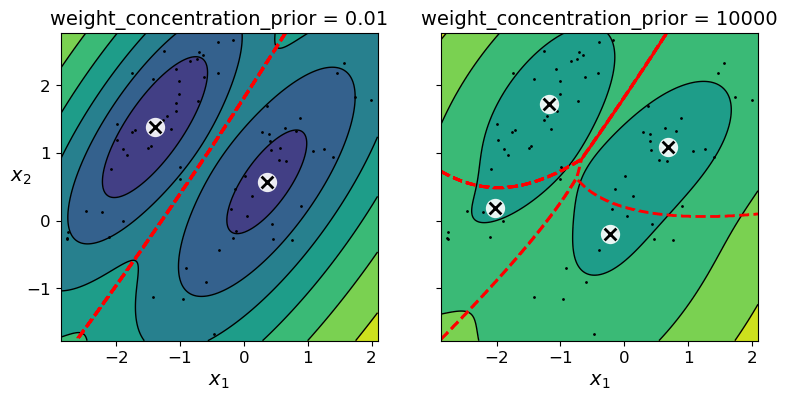

In [159]:
plt.figure(figsize=(9, 4))

plt.subplot(121)
plot_gaussian_mixture(bgm_low, X[:nn])
plt.title("weight_concentration_prior = 0.01", fontsize=14)

plt.subplot(122)
plot_gaussian_mixture(bgm_high, X[:nn], show_ylabels=False)
plt.title("weight_concentration_prior = 10000", fontsize=14)

# save_fig("mixture_concentration_prior_plot")
plt.show()

**베이즈 정리**는 데이터 X를 관측하고 난 후 잠재 변수에 대한 확률 분포를 업데이트하는 방법을 설명함
- **사후 확률 분포 $p(z|X)$**를 계산함
- 가우시안 혼합 모델에서 분모인 $p(X)$는 계산하기 매우 힘듦(적분해야 하기 때문)
---
**변분 추론**으로 해결

---
**블랙 박스 확률적 변분 추론(BBSVI)**가 있음
- 해당 변분 추론은 몇 개의 샘플을 q에서 뽑아 변분 파라미터 $\lambda$에 대한 ELBO의 그레이디언트를 추정하는데 사용함
- 이 방법으로 심층 신경망에서도 베이즈 추론을 사용할 수 있음

In [160]:
X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [161]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_moons)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

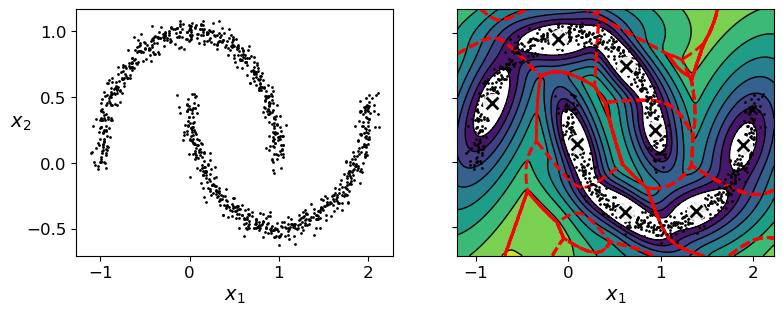

In [162]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_data(X_moons)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.subplot(122)
plot_gaussian_mixture(bgm, X_moons, show_ylabels=False)

# save_fig("moons_vs_bgm_plot")
plt.show()

무조건 타원형으로 찾는 베이즈 가우시안 혼합 모델은 두 개의 반달 모양을 식별하는 데 실패함

## 이상치 탐지와 특이치 탐지를 위한 다른 알고리즘

- **PCA(그리고 inverse_transform() 메서드를 가진 다른 차원 축소 기법)**
    - 보통 샘플의 재구성 오차와 이상치의 재구성 오차를 비교하면 일반적으로 후자가 훨씬 큼. 이를 통해 이상치 탐지를 할 수 있음
- **Fast-MCD**
    - EllipticEnvelope 클래스에서 구현된 알고리즘으로 이상치 감지에 유용함. 데이터셋을 정재할 때 사용되며 알고리즘이 가우시안 분포의 파라미터를 추정할 때 이상치로 의심되는 샘플을 무시함. 타원형을 잘 추정하고 이상치를 잘 구분하도록 도움
- **아이솔레이션 포레스트**
    - 고차원 데이터셋에서 이상치 감지를 위한 효율적인 알고리즘. 무작위로 성장한 결정 트리로 구성된 랜덤 포레스트를 만듦. 임계값을 랜덤으로 골라 데이터셋을 둘로 나눔. 평균적으로 이상치는 정상 샘플과 적은 단계에서 격리됨
- **LOF**
    - 주어진 샘플 주위의 밀도와 이웃 주위의 밀도를 비교함
    - 이상치는 종종 k개의 최근접 이웃보다 더 격리됨
- **one-class SVM**
    - 특이치 탐지에 잘 맞음
    - 샘플을 고차원 공간에 매핑한 다음 이 고차원 공간에서 선형 SVM 분류기를 사용해 두 클래스를 분리함
    - 원본 공간으로부터 고차원 공간에 있는 샘플을 분리
    - 새로운 샘플이 이 영역 안에 놓이지 않으면 이는 이상치임
   